For classification purpose we want to minimize the neg. log likelihood of the categories. For a binary case this is

$$L(\beta) = -\sum_{i=0}^{n} \log p(y_i \mid x_i) + \lambda ||\beta||^2$$


How do we compute the probability. From a discriminative function $f(x) = \phi(x)^T \beta$ we can  compute a (energy based) probability:

$$p(1 \mid x) = \frac{e^{f(x)}}{1+e^{f(x)}}$$

That's the logistic sigmoid $\sigma(f(x)) = \sigma(\phi(x)^T \beta)$.

$$L(\beta) = -\sum_{i=0}^n [y_i \log \sigma(\phi(x)^T \beta) + (1-y_i) \log (1-\sigma(\phi(x)^T \beta))] + ...$$

$$ = -\sum_{i=0}^n [y_i \beta^T \phi(x_i) - \log(1 + \exp{\beta^T\phi(x_i)}] $$

In [3]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [121]:
def logistic_regression(data, target):
    beta = beta_old = np.random.rand(data.shape[1] + 1)
    d = np.ndarray((data.shape[0], data.shape[1] + 1))
    d[:, 0] = 1
    d[:, 1:] = data
    d = d.T
    t = target.T
    while True:
        beta_old = np.array(beta)
        beta -= newton_step(d, t, beta)
        print(np.linalg.norm(beta - beta_old))
        if np.linalg.norm(beta - beta_old) < 0.01:
            break
    return beta
    
def newton_step(data, target, beta):
    p = sigmoid(beta.T @ data)
    jac = data @ (target - p)
    weights = np.eye(data.shape[1]) * p * (1-p)
    hessian = -data @ weights @ data.T
    return np.linalg.inv(hessian) @ jac
    
def sigmoid(x):
    return np.exp(x)/(1 + np.exp(x))

In [19]:
import sklearn.datasets

In [113]:
data, target = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_redundant=0)

In [122]:
beta = logistic_regression(data, target)

1.21044266139
0.962229770241
0.850708236608
0.542693586072
0.165129193569
0.011868346638
5.63492952452e-05


<a list of 7 text.Text objects>

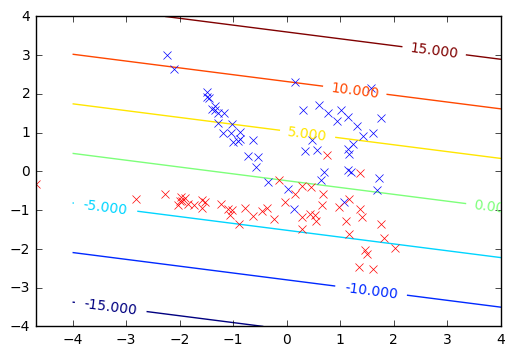

In [123]:
plt.plot(data[np.where(target==1), 0], data[np.where(target==1), 1], 'bx')
plt.plot(data[np.where(target==0), 0], data[np.where(target==0), 1], 'rx')
CS = plt.contour(X, Y, f(X,Y))
plt.clabel(CS, inline=1, fontsize=10)

In [62]:
data.shape

(100, 2)

In [69]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)

X, Y = np.meshgrid(x, y)

In [79]:
beta@[1, -.8, 0]

array([-0.04551462])

In [116]:
def f(x1, x2):
    X1 = np.asarray(x1.flat)
    X2 = np.asarray(x2.flat)
    d = np.ones((X1.shape[0], 3))
    d[:, 1] = X1
    d[:, 2] = X2
    return ((beta @ d.T)).reshape(x1.shape[0], x1.shape[1])

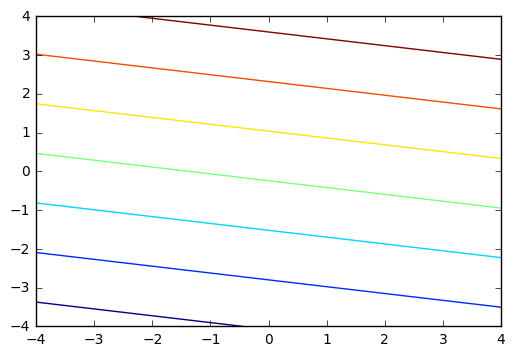

In [124]:
plt.contour(X, Y, f(X,Y))